<a href="https://colab.research.google.com/github/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/4_image_classification_zoo/Classifier%20-%20Bird%20Species%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of contents

## Theory

## Install Monk


## Using pretrained model for classifying X-Ray dataset of COVID-19


## Training a classifier from scratch

# Some theory

ResNet is a short name for Residual Network. As the name of the network indicates, the new terminology that this network introduces is residual learning.

What is the need for Residual Learning?

Deep convolutional neural networks have led to a series of breakthroughs for image classification. Many other visual recognition tasks have also greatly benefited from very deep models. So, over the years there is a trend to go more deeper, to solve more complex tasks and to also increase /improve the classification/recognition accuracy. But, as we go deeper; the training of neural network becomes difficult and also the accuracy starts saturating and then degrades also. Residual Learning tries to solve both these problems.

What is Residual Learning?

In general, in a deep convolutional neural network, several layers are stacked and are trained to the task at hand. The network learns several low/mid/high level features at the end of its layers. In residual learning, instead of trying to learn some features, we try to learn some residual. Residual can be simply understood as subtraction of feature learned from input of that layer. ResNet does this using shortcut connections (directly connecting input of nth layer to some (n+x)th layer. It has proved that training this form of networks is easier than training simple deep convolutional neural networks and also the problem of degrading accuracy is resolved.

So, ResNet-50 is a deep residual network. The “50” refers to the number of layers it has. It’s a subclass of convolutional neural networks, with ResNet most popularly used for image classification.

The main innovation of ResNet is the skip connection. As you know, without adjustments, deep networks often suffer from vanishing gradients, ie: as the model backpropagates, the gradient gets smaller and smaller. Tiny gradients can make learning intractable.

The skip connection in the diagram below is labeled “identity.” It allows the network to learn the identity function, which allows it pass the the input through the block without passing through the other weight layers!

![](https://qphs.fs.quoracdn.net/main-qimg-03903ebf7079087adea3dc711c92ec31)

Similarly we have other Networks- ResNet-34 and ResNet-18

This allows you to stack additional layers and build a deeper network, offsetting the vanishing gradient by allowing your network to skip through layers of it feels they are less relevant in training.

# Install Monk

  - git clone https://github.com/Tessellate-Imaging/monk_v1.git

  - cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt
        (Select the requirements file as per OS and CUDA version)


In [2]:
! git clone https://github.com/Tessellate-Imaging/monk_v1.git

Cloning into 'monk_v1'...
remote: Enumerating objects: 672, done.
remote: Counting objects: 100% (672/672), done.
remote: Compressing objects: 100% (365/365), done.
remote: Total 4420 (delta 459), reused 449 (delta 306), pack-reused 3748
Receiving objects: 100% (4420/4420), 143.10 MiB | 31.18 MiB/s, done.
Resolving deltas: 100% (2726/2726), done.


In [3]:
# If using Colab install using the commands below
! cd monk_v1/installation/Misc && pip install -r requirements_colab.txt

# If using Kaggle uncomment the following command
#! cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt

# Select the requirements file as per OS and CUDA version when using a local system or cloud
#! cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt



     |████████████████████████████████| 710.5MB 25kB/s 
     |████████████████████████████████| 757kB 50.8MB/s 
  Created wheel for GPUtil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7413 sha256=0c5f86726cd3e23d51639253acb599448c578fd87a330c4a30e6811b3d2620b7
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built GPUtil
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


# Used trained classifier for demo

In [0]:
# Import monk

import os
import sys
sys.path.append("monk_v1/monk/");

In [92]:
ls

Chest-X-Ray-COVID-19-Resnet18.zip         gdrive/
Chest-X-Ray-COVID-19-Resnet34.zip         monk_v1/
Chest-X-Ray-COVID-19-Resnet50.zip         sample_data/
covid19-xray-dataset-train-test-sets.zip  workspace/
dataset/


In [0]:
# Download trained weights 

In [94]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/file/d/1-GoVeMJhzcQKxLE3Ow65S5O3ytbYo_VR/view?usp=sharing' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1-GoVeMJhzcQKxLE3Ow65S5O3ytbYo_VR" -O Chest-X-Ray-COVID-19-Resnet && rm -rf /tmp/cookies.txt

--2020-05-24 12:43:47--  https://drive.google.com/file/d/1-GoVeMJhzcQKxLE3Ow65S5O3ytbYo_VR/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 108.177.126.101, 108.177.126.138, 108.177.126.102, ...
Connecting to drive.google.com (drive.google.com)|108.177.126.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]  68.48K  --.-KB/s    in 0.09s   

2020-05-24 12:43:48 (802 KB/s) - written to stdout [70126]

--2020-05-24 12:43:48--  https://docs.google.com/uc?export=download&confirm=&id=1-GoVeMJhzcQKxLE3Ow65S5O3ytbYo_VR
Resolving docs.google.com (docs.google.com)... 108.177.119.102, 108.177.119.138, 108.177.119.113, ...
Connecting to docs.google.com (docs.google.com)|108.177.119.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Chest-X-Ray-COVID-19-Resnet50’

Chest-X-Ray-COVID-1     [ <=>           

In [0]:
! unzip -qq Chest-X-Ray-COVID-19-Resnet.zip

In [0]:
ls workspace/Chest-X-Ray-COVID-19/

In [0]:
# Gluon project
from gluon_prototype import prototype

In [98]:
pwd

'/content'

In [100]:
# Load project in inference mode

gtf = prototype(verbose=1);
gtf.Prototype("Chest-X-Ray-COVID-19", "Gluon-resnet50_v2_3e", eval_infer=True);


Mxnet Version: 1.6.0

Model Details
    Loading model - workspace/Chest-X-Ray-COVID-19/Gluon-resnet50_v2_3e/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Chest-X-Ray-COVID-19
    Experiment: Gluon-resnet50_v2_3e
    Dir: /content/workspace/Chest-X-Ray-COVID-19/Gluon-resnet50_v2_3e/



In [0]:
#Infer

Prediction
    Image name:         /content/dataset/xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0035-0001.jpeg
    Predicted class:      NORMAL
    Predicted score:      4.280884742736816



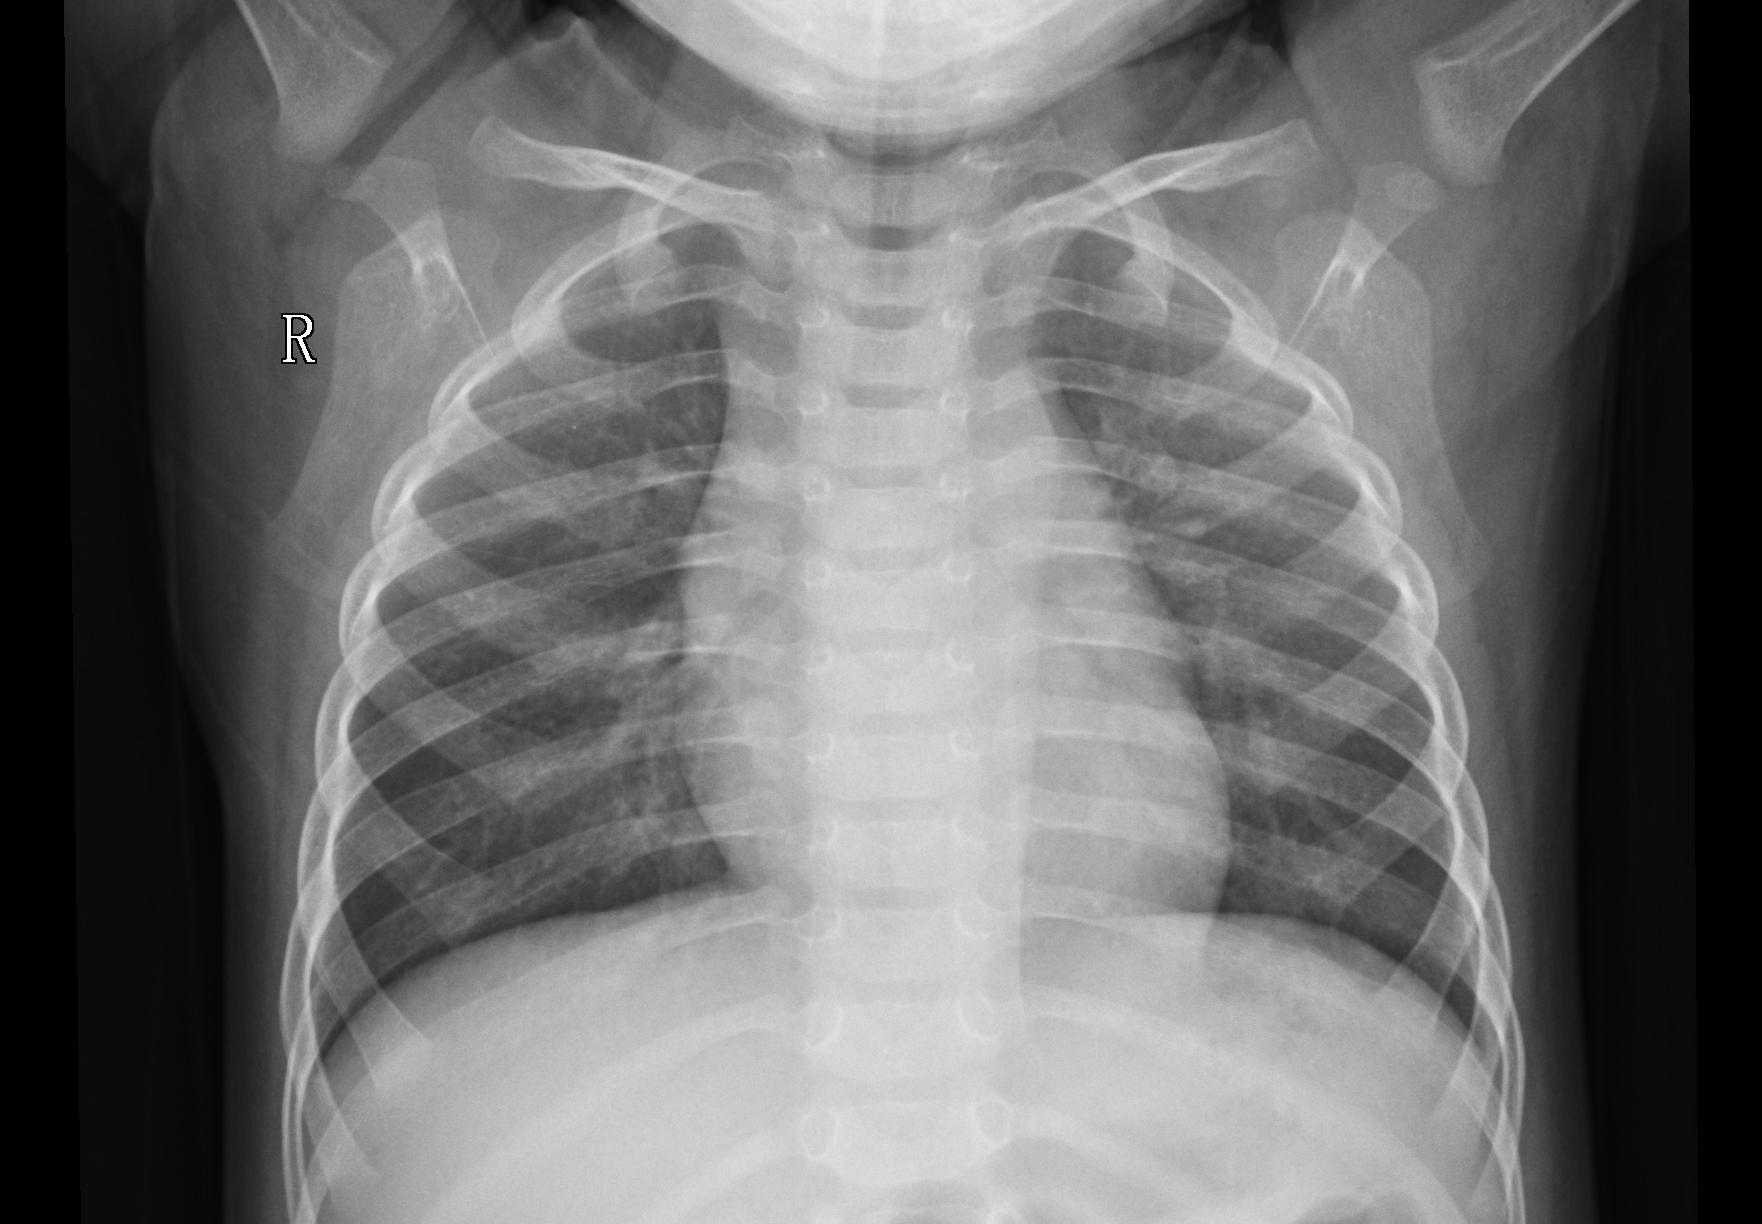

In [101]:
img_name = "/content/dataset/xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0035-0001.jpeg"
predictions = gtf.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name)


Prediction
    Image name:         /content/dataset/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10.jpeg
    Predicted class:      PNEUMONIA
    Predicted score:      2.7173655033111572



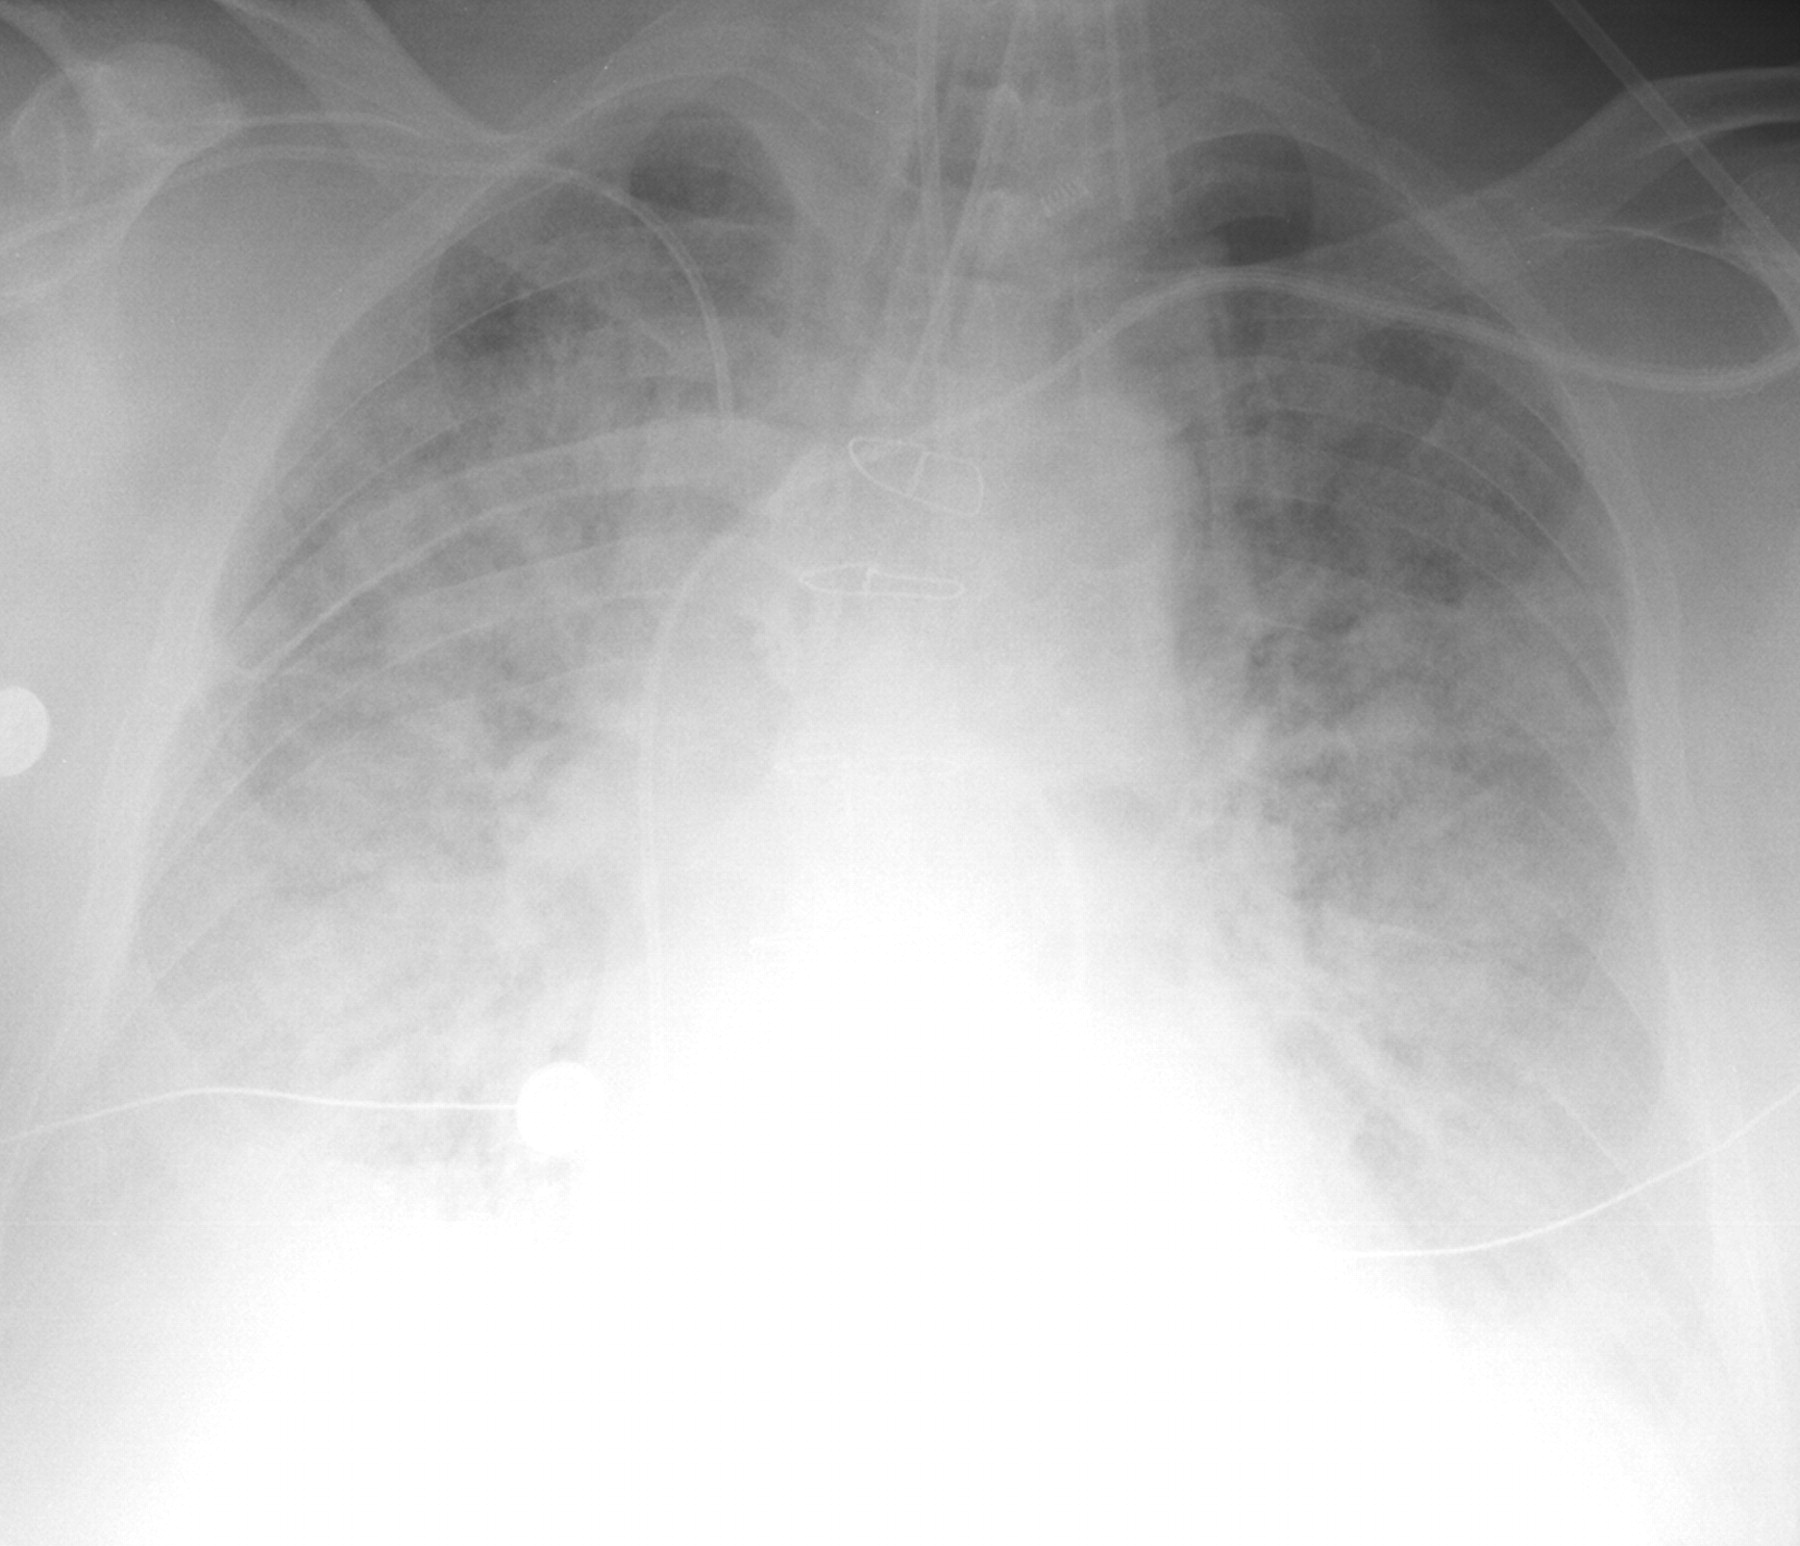

In [102]:
img_name = "/content/dataset/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10.jpeg"
predictions = gtf.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name)

# Training custom classifier from scratch

## Dataset
    - Credits: https://www.kaggle.com/gpiosenka/100-bird-species

## Download

In [15]:
! pip install kaggle

In [16]:
pwd

'/'

In [17]:
cd content

/content


In [0]:
!mkdir .kaggle

In [0]:
import json
token = {"username":"kingsmanvk","key":"f9b01108749b670e9021cb07290e18c6"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [20]:
cd ..

/


In [21]:
cd root

/root


In [0]:
!mkdir .kaggle

In [0]:
!cp /content/.kaggle/kaggle.json /root/.kaggle/kaggle.json

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [25]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [27]:
cd ../content

/content


In [28]:
!kaggle datasets download -d khoongweihao/covid19-xray-dataset-train-test-sets -p /content

 96% 81.0M/84.3M [00:02<00:00, 33.2MB/s]
100% 84.3M/84.3M [00:02<00:00, 38.9MB/s]


In [0]:
! unzip -qq covid19-xray-dataset-train-test-sets.zip -d dataset

## Training

In [0]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

In [0]:
# Using mxnet-gluon backend 
from gluon_prototype import prototype

# For pytorch backend
#from pytorch_prototype import prototype

# For Keras backend
#from keras_prototype import prototype

In [70]:
# Create Project and Experiment

gtf = prototype(verbose=1);
gtf.Prototype("Chest-X-Ray-COVID-19", "Gluon-resnet50_v2_3e");

Mxnet Version: 1.6.0

Experiment Details
    Project: Chest-X-Ray-COVID-19
    Experiment: Gluon-resnet50_v2_3e
    Dir: /content/workspace/Chest-X-Ray-COVID-19/Gluon-resnet50_v2_3e/



In [66]:
cd content


/content


In [67]:
ls

Chest-X-Ray-COVID-19-Resnet18.zip         dataset/  sample_data/
Chest-X-Ray-COVID-19-Resnet34.zip         gdrive/   workspace/
covid19-xray-dataset-train-test-sets.zip  monk_v1/


In [71]:
gtf.Default(dataset_path="dataset/xray_dataset_covid19/train",
            model_name="resnet50_v2", 
            freeze_base_network=False,
            num_epochs=3);

Dataset Details
    Train path:     dataset/xray_dataset_covid19/train
    Val path:       None
    CSV train path: None
    CSV val path:   None
    Label Type:     single

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   2
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 103
    Num val images:   45
    Num classes:      2

Model Params
    Model name:           resnet50_v2
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  False

Model Details
    Loading pretrained model






  0%|          | 0/92862 [00:00<?, ?KB/s]



  0%|          | 34/92862 [00:00<06:28, 238.70KB/s]



  0%|          | 101/92862 [00:00<05:34, 277.62KB/s]



  0%|          | 238/92862 [00:00<04:23, 351.23KB/s]



  1%|          | 525/92862 [00:00<03:19, 463.83KB/s]



  1%|          | 984/92862 [00:00<02:27, 624.44KB/s]



  2%|▏         | 1512/92862 [00:00<01:50, 829.46KB/s]



  3%|▎         | 2888/92862 [00:01<01:18, 1141.11KB/s]



  5%|▍         | 4510/92862 [00:01<00:56, 1560.13KB/s]



  8%|▊         | 7166/92862 [00:01<00:39, 2147.22KB/s]



 13%|█▎        | 12084/92862 [00:01<00:27, 2985.43KB/s]



 18%|█▊        | 16855/92862 [00:01<00:18, 4097.48KB/s]



 23%|██▎       | 21516/92862 [00:01<00:12, 5541.61KB/s]



 28%|██▊       | 26412/92862 [00:01<00:08, 7396.30KB/s]



 34%|███▍      | 31460/92862 [00:02<00:06, 9663.27KB/s]



 39%|███▉      | 36500/92862 [00:02<00:04, 12287.94KB/s]



 45%|████▍     | 41389/92862 [00:02<00:03, 15144.15KB/s]



 50%|████▉     | 46254/928

    Model Loaded on device
        Model name:                           resnet50_v2
        Num of potentially trainable layers:  105
        Num of actual trainable layers:       104

Optimizer
    Name:          sgd
    Learning rate: 0.01
    Params:        {'lr': 0.01, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}



Learning rate scheduler
    Name:   steplr
    Params: {'step_size': 1, 'gamma': 0.98, 'last_epoch': -1}

Loss
    Name:          softmaxcrossentropy
    Params:        {'weight': None, 'batch_axis': 0, 'axis_to_sum_over': -1, 'label_as_categories': True, 'label_smoothing': False}

Training params
    Num Epochs: 3

Display params
    Display progress:          True
    Display progress realtime: True
    Save Training logs:        True
    Save Intermediate models:  True
    Intermediate model prefix: intermediate_model_



monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


### How to change hyper parameters and models 
  - Docs - https://github.com/Tessellate-Imaging/monk_v1#4
  - Examples - https://github.com/Tessellate-Imaging/monk_v1/tree/master/study_roadmaps/1_getting_started_roadmap

In [72]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed





  0%|          | 0/26 [00:00<?, ?it/s]

Training Start
    Epoch 1/3
    ----------






  4%|▍         | 1/26 [00:00<00:05,  4.33it/s]



  8%|▊         | 2/26 [00:00<00:06,  3.56it/s]



 12%|█▏        | 3/26 [00:00<00:05,  4.29it/s]



 15%|█▌        | 4/26 [00:00<00:04,  5.04it/s]



 19%|█▉        | 5/26 [00:00<00:03,  5.78it/s]



 23%|██▎       | 6/26 [00:01<00:04,  4.83it/s]



 31%|███       | 8/26 [00:01<00:03,  5.75it/s]



 38%|███▊      | 10/26 [00:01<00:02,  6.32it/s]



 46%|████▌     | 12/26 [00:02<00:02,  6.36it/s]



 50%|█████     | 13/26 [00:02<00:03,  3.96it/s]



 54%|█████▍    | 14/26 [00:02<00:02,  4.68it/s]



 58%|█████▊    | 15/26 [00:02<00:01,  5.53it/s]



 65%|██████▌   | 17/26 [00:03<00:01,  4.85it/s]



 73%|███████▎  | 19/26 [00:03<00:01,  5.80it/s]



 77%|███████▋  | 20/26 [00:03<00:01,  5.78it/s]



 81%|████████  | 21/26 [00:03<00:00,  6.44it/s]



 85%|████████▍ | 22/26 [00:03<00:00,  5.88it/s]



 88%|████████▊ | 23/26 [00:04<00:00,  6.38it/s]



 92%|█████████▏| 24/26 [00:04<00:00,  6.27it/s]



 96%|█████████▌| 25/26 [00:04<00:0



    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.777, Train-loss: 0.475 | Val-acc: 0.933333, Val-loss: 0.280, | time: 7.2 sec

    Epoch 2/3
    ----------


  4%|▍         | 1/26 [00:00<00:04,  5.48it/s]




  8%|▊         | 2/26 [00:00<00:04,  5.68it/s]




 12%|█▏        | 3/26 [00:00<00:04,  5.69it/s]




 15%|█▌        | 4/26 [00:00<00:03,  6.46it/s]




 19%|█▉        | 5/26 [00:00<00:03,  5.82it/s]




 23%|██▎       | 6/26 [00:00<00:03,  6.49it/s]




 27%|██▋       | 7/26 [00:01<00:02,  6.96it/s]




 31%|███       | 8/26 [00:01<00:04,  3.95it/s]




 35%|███▍      | 9/26 [00:01<00:03,  4.75it/s]




 38%|███▊      | 10/26 [00:01<00:02,  5.60it/s]




 46%|████▌     | 12/26 [00:01<00:02,  6.51it/s]




 50%|█████     | 13/26 [00:02<00:02,  5.21it/s]




 54%|█████▍    | 14/26 [00:02<00:01,  6.04it/s]




 58%|█████▊    | 15/26 [00:02<00:01,  6.19it/s]




 62%|██████▏   | 16/26 [00:02<00:01,  6.74it/s]




 65%|██████▌   | 17/26 [00:02<00:01,  7.37it/s]




 69%|██████▉   | 18/26 [00:03<00:01,  4.56it/s]




 73%|███████▎  | 19/26 [00:03<00:01,  5.40it/s]




 77%|███████▋  | 20/26 [00:03<00:00,  6.25it/s]




 81%|████████  | 21/2



    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.806, Train-loss: 0.585 | Val-acc: 0.777778, Val-loss: 0.442, | time: 6.7 sec

    Epoch 3/3
    ----------







  8%|▊         | 2/26 [00:00<00:03,  6.33it/s]




 12%|█▏        | 3/26 [00:00<00:03,  6.20it/s]




 15%|█▌        | 4/26 [00:00<00:03,  6.71it/s]




 19%|█▉        | 5/26 [00:00<00:04,  5.21it/s]




 23%|██▎       | 6/26 [00:00<00:03,  6.01it/s]




 27%|██▋       | 7/26 [00:01<00:04,  4.03it/s]




 31%|███       | 8/26 [00:01<00:03,  4.80it/s]




 38%|███▊      | 10/26 [00:01<00:02,  5.60it/s]




 42%|████▏     | 11/26 [00:01<00:02,  6.22it/s]




 46%|████▌     | 12/26 [00:01<00:02,  6.84it/s]




 50%|█████     | 13/26 [00:02<00:02,  5.09it/s]




 54%|█████▍    | 14/26 [00:02<00:02,  5.86it/s]




 62%|██████▏   | 16/26 [00:02<00:01,  6.77it/s]




 65%|██████▌   | 17/26 [00:02<00:01,  7.44it/s]




 69%|██████▉   | 18/26 [00:03<00:01,  5.44it/s]




 73%|███████▎  | 19/26 [00:03<00:01,  6.20it/s]




 77%|███████▋  | 20/26 [00:03<00:00,  6.74it/s]




 81%|████████  | 21/26 [00:03<00:00,  7.44it/s]




 85%|████████▍ | 22/26 [00:03<00:00,  8.02it/s]




 88%|████████▊



    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.903, Train-loss: 0.254 | Val-acc: 0.777778, Val-loss: 0.487, | time: 6.5 sec

    Training completed in: 0m 19s
    Best val Acc:          0.933333

Training End

Training Outputs
    Model Dir:   /content/workspace/Chest-X-Ray-COVID-19/Gluon-resnet50_v2_3e/output/models/
    Log Dir:     /content/workspace/Chest-X-Ray-COVID-19/Gluon-resnet50_v2_3e/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:                  train_loss_history.npy
    Log 6 - Validation curve:                train_loss_history.npy



<Figure size 432x288 with 0 Axes>

## Validating on a new dataset

In [0]:
# Import monk

import os
import sys
sys.path.append("monk_v1/monk/");

In [0]:
# Using mxnet-gluon backend 
from gluon_prototype import prototype

# For pytorch backend
#rom pytorch_prototype import prototype

# For Keras backend
#from keras_prototype import prototype

In [79]:
# Create Project and Experiment

gtf = prototype(verbose=1);
gtf.Prototype("Chest-X-Ray-COVID-19", "Gluon-resnet50_v2_3e",eval_infer=True);


Mxnet Version: 1.6.0

Model Details
    Loading model - workspace/Chest-X-Ray-COVID-19/Gluon-resnet50_v2_3e/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Chest-X-Ray-COVID-19
    Experiment: Gluon-resnet50_v2_3e
    Dir: /content/workspace/Chest-X-Ray-COVID-19/Gluon-resnet50_v2_3e/



In [80]:
# Load dataset for validaion
gtf.Dataset_Params(dataset_path="dataset/xray_dataset_covid19/train");
gtf.Dataset();

Dataset Details
    Test path:      dataset/xray_dataset_covid19/train
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   2

Pre-Composed Test Transforms
[{'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num test images: 148
    Num classes:      2



In [81]:
# Run validation
accuracy, class_based_accuracy = gtf.Evaluate();







  0%|          | 0/148 [00:00<?, ?it/s]

Testing








  1%|▏         | 2/148 [00:00<00:15,  9.22it/s]





  5%|▌         | 8/148 [00:00<00:11, 12.00it/s]





  7%|▋         | 11/148 [00:00<00:09, 14.41it/s]





  9%|▉         | 13/148 [00:00<00:08, 15.21it/s]





 11%|█▏        | 17/148 [00:00<00:07, 18.68it/s]





 14%|█▍        | 21/148 [00:00<00:06, 20.03it/s]





 18%|█▊        | 26/148 [00:00<00:05, 23.88it/s]





 20%|██        | 30/148 [00:01<00:04, 25.73it/s]





 23%|██▎       | 34/148 [00:01<00:04, 24.10it/s]





 26%|██▋       | 39/148 [00:01<00:03, 28.06it/s]





 30%|██▉       | 44/148 [00:01<00:03, 31.14it/s]





 34%|███▍      | 50/148 [00:01<00:02, 35.53it/s]





 37%|███▋      | 55/148 [00:01<00:02, 35.47it/s]





 41%|████      | 61/148 [00:01<00:02, 38.20it/s]





 45%|████▍     | 66/148 [00:02<00:02, 40.23it/s]





 48%|████▊     | 71/148 [00:02<00:01, 40.15it/s]





 51%|█████▏    | 76/148 [00:02<00:02, 35.85it/s]





 56%|█████▌    | 83/148 [00:02<00:01, 41.50it/s]





 59%|█████▉    | 88/148 


    Result
        class based accuracies
            0. NORMAL - 97.2972972972973 %
            1. PNEUMONIA - 100.0 %
        total images:            148
        num correct predictions: 146
        Average accuracy (%):    98.64864864864865



In [0]:
cd ../..

/


In [0]:
ls

bin/                                       etc/    opt/    sys/
boot/                                      home/   proc/   tensorflow-1.15.2/
content/                                   lib/    root/   tmp/
datalab/                                   lib32/  run/    tools/
dev/                                       lib64/  sbin/   usr/
dlib-19.18.0-cp27-cp27mu-linux_x86_64.whl  media/  srv/    var/
dlib-19.18.0-cp36-cp36m-linux_x86_64.whl   mnt/    swift/


Prediction
    Image name:         /content/dataset/xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0035-0001.jpeg
    Predicted class:      NORMAL
    Predicted score:      3.7171971797943115



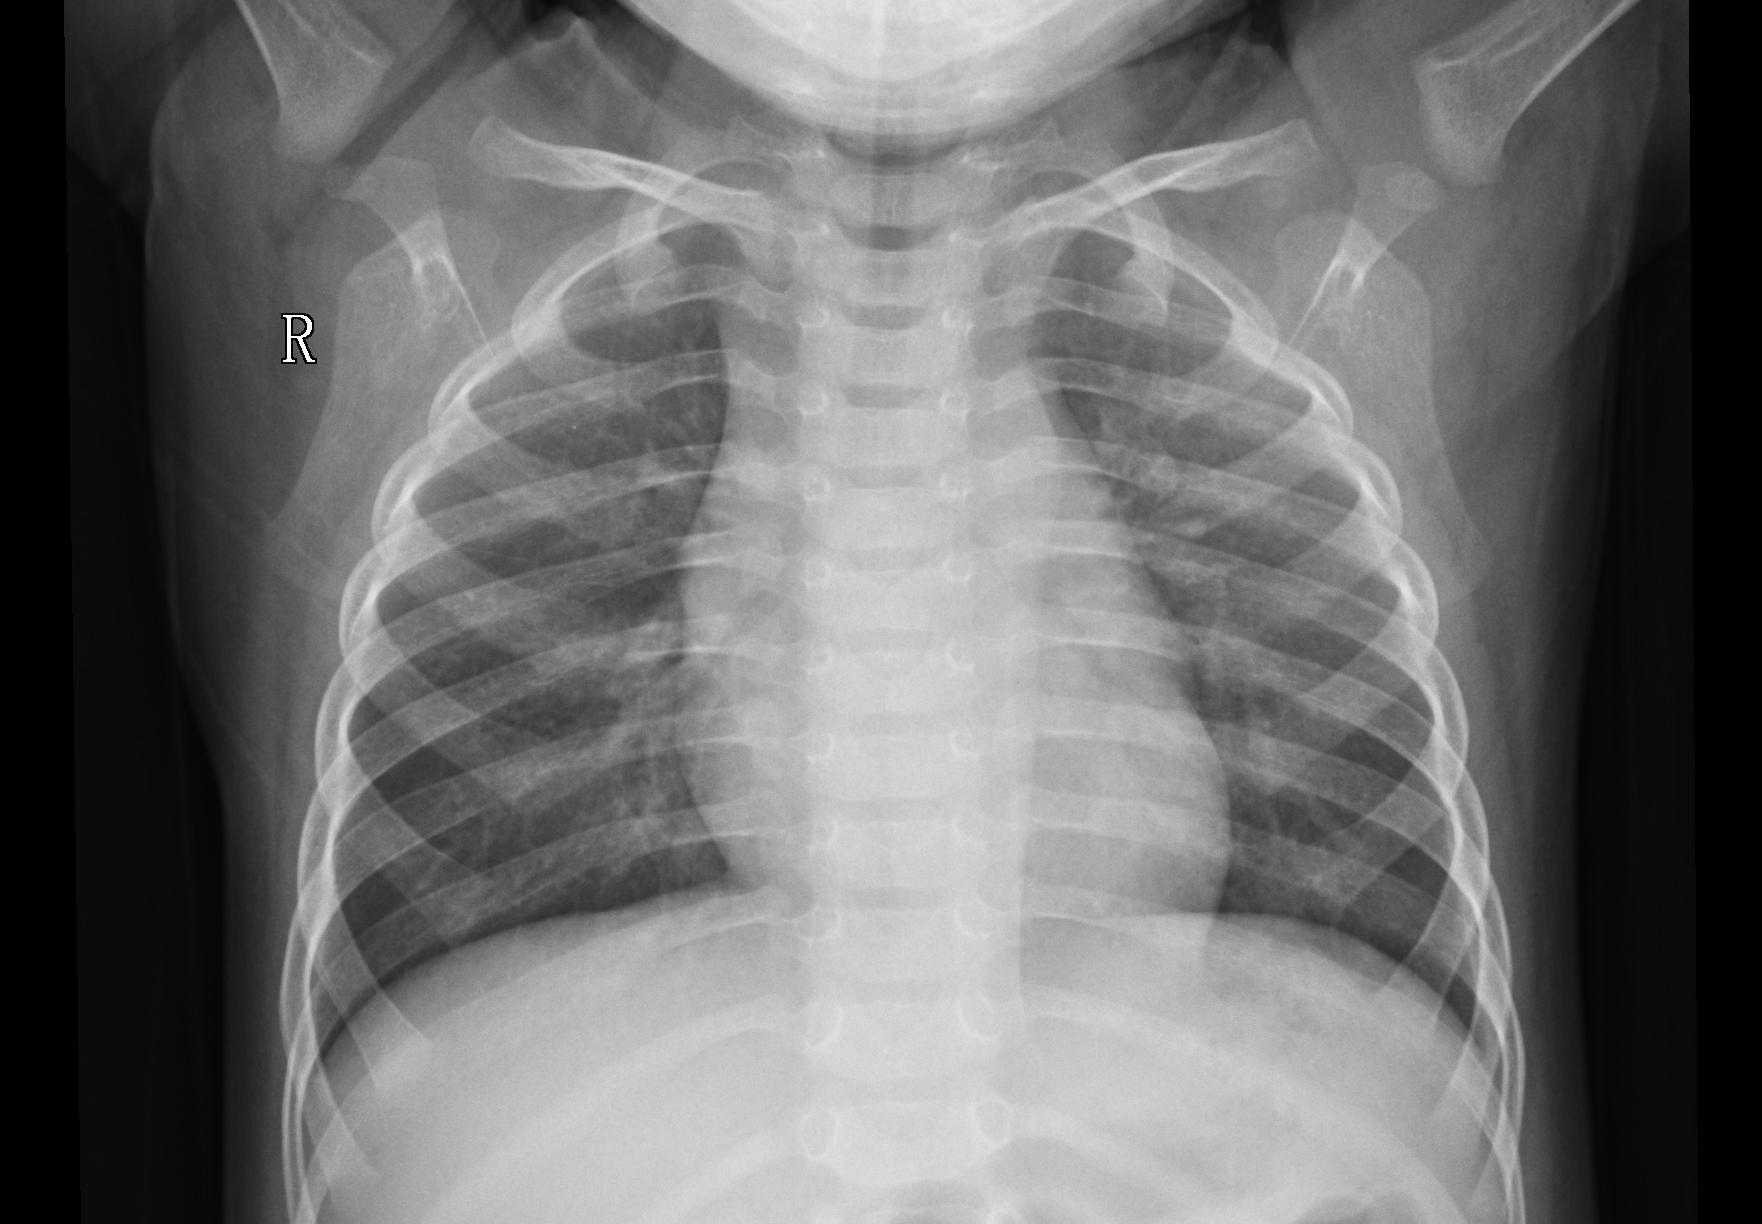

In [41]:
img_name = "/content/dataset/xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0035-0001.jpeg"
predictions = gtf.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name)


Prediction
    Image name:         /content/dataset/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10.jpeg
    Predicted class:      PNEUMONIA
    Predicted score:      2.502800226211548



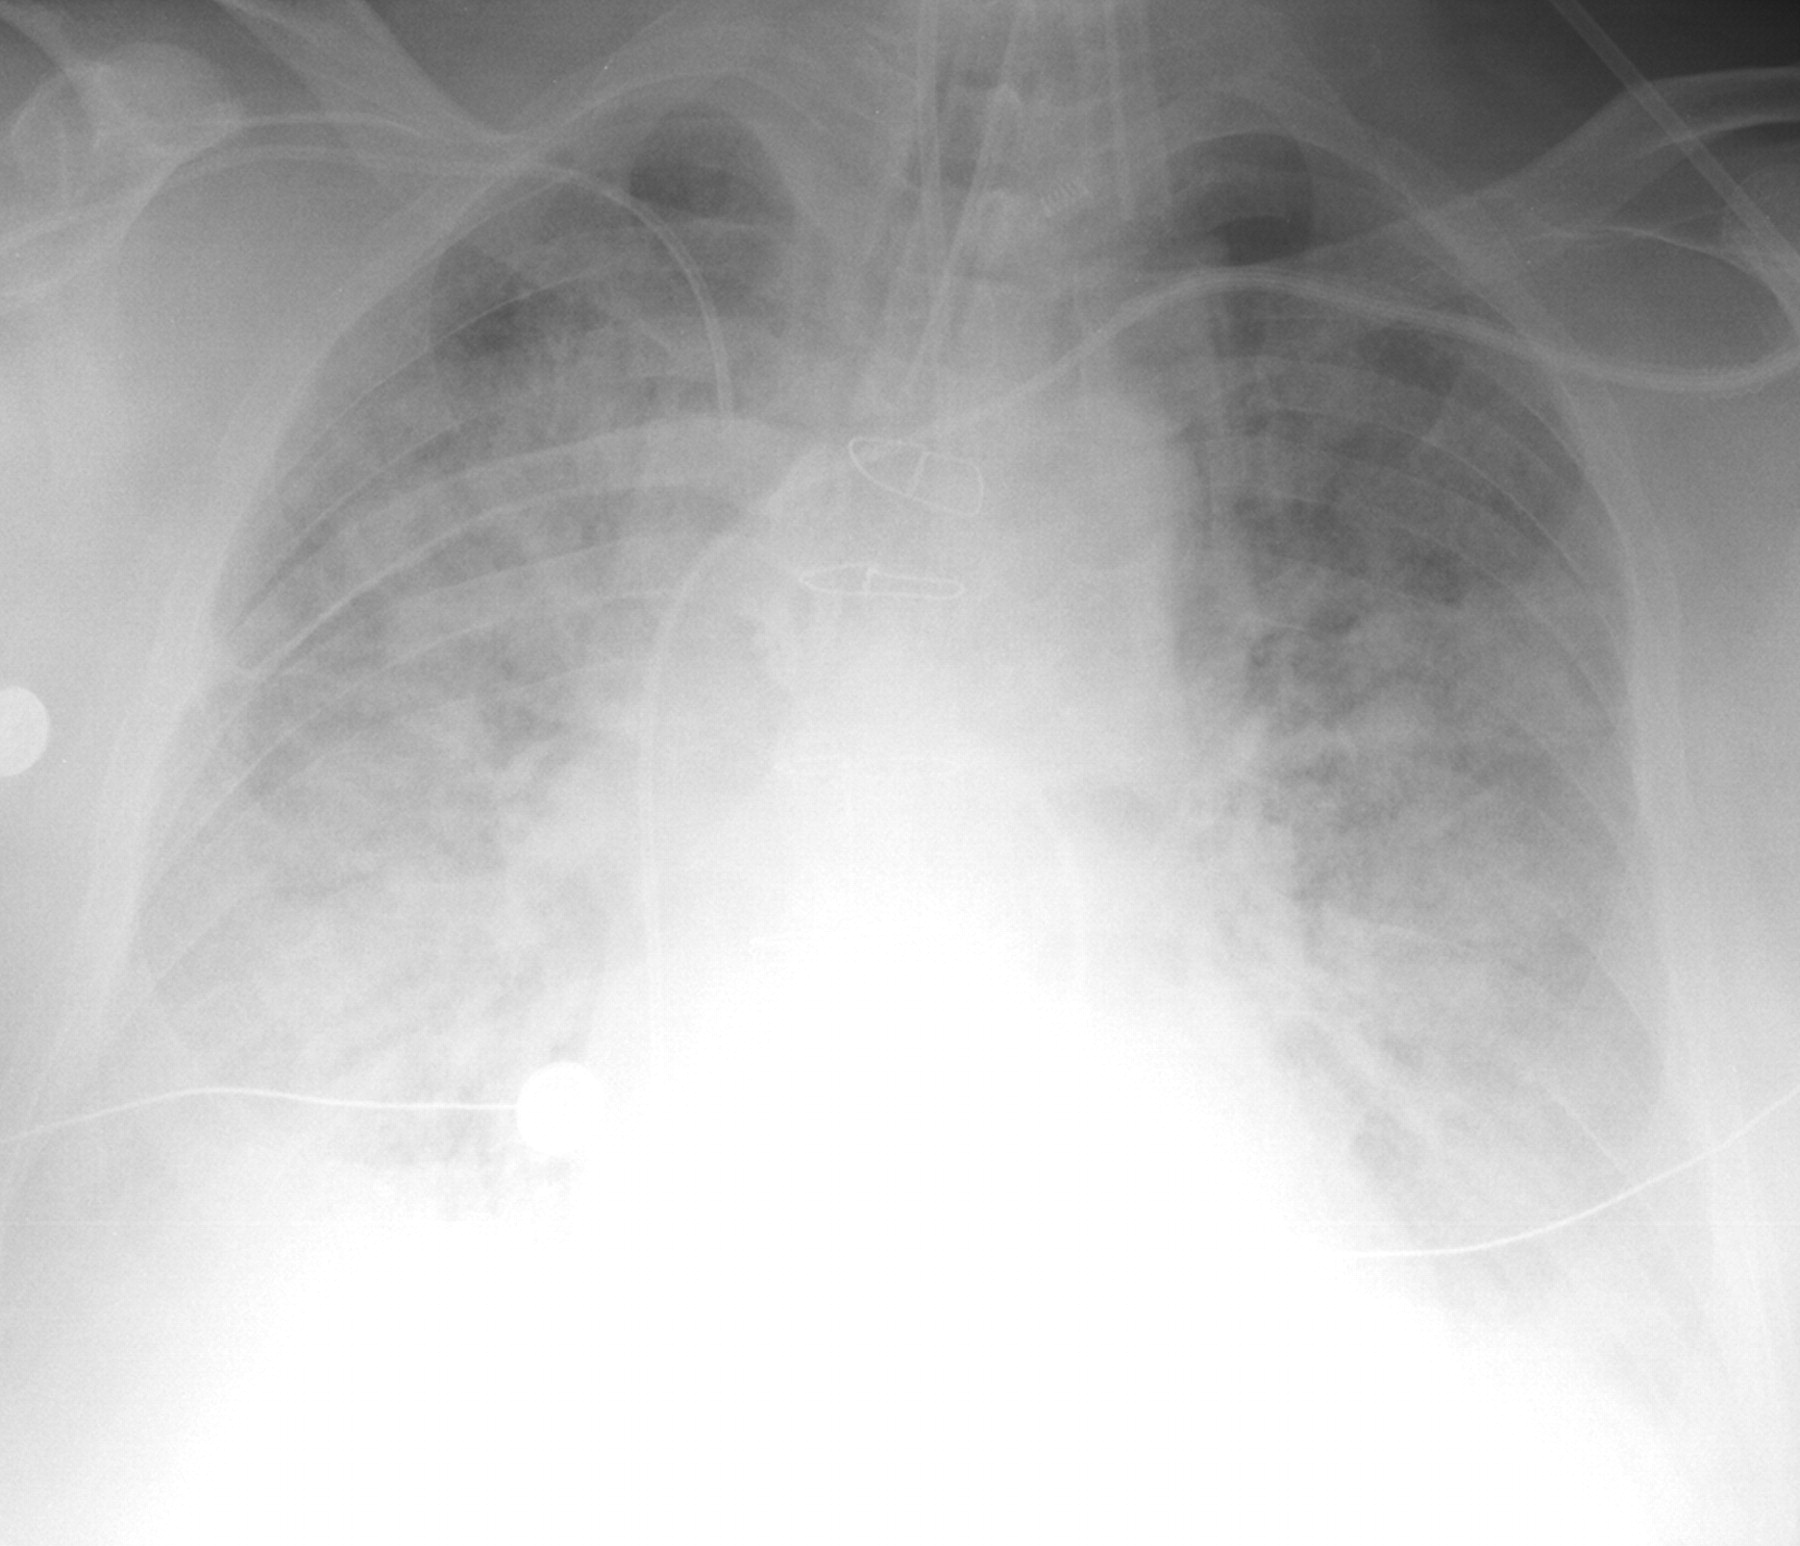

In [42]:
img_name = "/content/dataset/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10.jpeg"
predictions = gtf.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name)

In [43]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [60]:
cd ..

/


In [82]:
ls

Chest-X-Ray-COVID-19-Resnet18.zip         dataset/  sample_data/
Chest-X-Ray-COVID-19-Resnet34.zip         gdrive/   workspace/
covid19-xray-dataset-train-test-sets.zip  monk_v1/


In [83]:

!zip -r /content/Chest-X-Ray-COVID-19-Resnet50.zip /content/workspace

  adding: content/workspace/ (stored 0%)
  adding: content/workspace/Chest-X-Ray-COVID-19/ (stored 0%)
  adding: content/workspace/Chest-X-Ray-COVID-19/Gluon-resnet18_v2/ (stored 0%)
  adding: content/workspace/Chest-X-Ray-COVID-19/Gluon-resnet18_v2/experiment_state.json (deflated 81%)
  adding: content/workspace/Chest-X-Ray-COVID-19/Gluon-resnet18_v2/output/ (stored 0%)
  adding: content/workspace/Chest-X-Ray-COVID-19/Gluon-resnet18_v2/output/logs/ (stored 0%)
  adding: content/workspace/Chest-X-Ray-COVID-19/Gluon-resnet18_v2/output/logs/train_val_loss.png (deflated 6%)
  adding: content/workspace/Chest-X-Ray-COVID-19/Gluon-resnet18_v2/output/logs/val_acc_history.npy (deflated 43%)
  adding: content/workspace/Chest-X-Ray-COVID-19/Gluon-resnet18_v2/output/logs/train_val_accuracy.png (deflated 4%)
  adding: content/workspace/Chest-X-Ray-COVID-19/Gluon-resnet18_v2/output/logs/train_loss_history.npy (deflated 39%)
  adding: content/workspace/Chest-X-Ray-COVID-19/Gluon-resnet18_v2/output/l

In [85]:
cd 

Chest-X-Ray-COVID-19-Resnet18.zip         gdrive/
Chest-X-Ray-COVID-19-Resnet34.zip         monk_v1/
Chest-X-Ray-COVID-19-Resnet50.zip         sample_data/
covid19-xray-dataset-train-test-sets.zip  workspace/
dataset/


In [0]:
cp -r Chest-X-Ray-COVID-19-Resnet50.zip /content/gdrive/My\ Drive/Chest-X-Ray-COVID-19-Resnet50.zip

In [0]:
cp -r Chest-X-Ray-COVID-19-Resnet34.zip /content/gdrive/My\ Drive/Chest-X-Ray-COVID-19-Resnet34.zip

In [0]:
cp -r Chest-X-Ray-COVID-19-Resnet18.zip /content/gdrive/My\ Drive/Chest-X-Ray-COVID-19-Resnet18.zip

#Insights : 
## With 3 Epoch, Results are as follows
## ResNet-50
        class based accuracies
            0. NORMAL - 97.2972972972973 %
            1. PNEUMONIA - 100.0 %
        total images:            148
        num correct predictions: 146
        Average accuracy (%):    98.64864864864865
## ResNet-34
        class based accuracies
            0. NORMAL - 95.94594594594594 %
            1. PNEUMONIA - 98.64864864864865 %
        total images:            148
        num correct predictions: 144
        Average accuracy (%):    97.2972972972973
## ResNet-18
        class based accuracies
            0. NORMAL - 100.0 %
            1. PNEUMONIA - 98.64864864864865 %
        total images:            148
        num correct predictions: 147
        Average accuracy (%):    99.32432432432432